<a href="https://colab.research.google.com/github/vthamada/TelecomX/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#üìå Extrac√£o

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

dados = pd.read_json(url)

#üîß Transforma√ß√£o

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [ ]:
dados.head()

customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...

In [ ]:
dados_customer = pd.json_normalize(dados['customer'])
dados_phone = pd.json_normalize(dados['phone'])
dados_internet = pd.json_normalize(dados['internet'])
dados_account = pd.json_normalize(dados['account'])

dados_final = pd.concat(
    [dados[['customerID', 'Churn']], dados_customer, dados_phone, dados_internet, dados_account], axis=1
)

In [ ]:
dados_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
dados_final.dtypes

customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object

In [ ]:
dados_final.head()

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1               No          No          No             Yes  Month-to-month   
2              Yes          No          No              No  Month-to-month   
3              Yes          No         Yes             Yes  Month-to-month   
4               No         Yes         Yes              No  Month-to-month   

  PaperlessBilling     PaymentMethod Charges.Monthly  Charges.Total  
0              Yes      Mailed check            65.6          593.3  
1               No      Mailed check            59.9          542.4  
2              Yes  Electronic check            73.9         280.85  
3              Yes  Electronic check            98.0        1237.85  
4              Yes      Mailed check            83.9          267.4  

[5 rows x 21 columns]

In [ ]:
dados_final.isnull().sum()

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

In [ ]:
dados_final.duplicated().sum()

np.int64(0)

In [ ]:
colunas_categoricas = [
    'Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
]

for col in colunas_categoricas:
    valores_unicos = dados_final[col].unique()
    print(f"Coluna: {col} ‚Üí {valores_unicos} \n")

Coluna: Churn ‚Üí ['No' 'Yes' ''] 

Coluna: gender ‚Üí ['Female' 'Male'] 

Coluna: Partner ‚Üí ['Yes' 'No'] 

Coluna: Dependents ‚Üí ['Yes' 'No'] 

Coluna: PhoneService ‚Üí ['Yes' 'No'] 

Coluna: MultipleLines ‚Üí ['No' 'Yes' 'No phone service'] 

Coluna: InternetService ‚Üí ['DSL' 'Fiber optic' 'No'] 

Coluna: OnlineSecurity ‚Üí ['No' 'Yes' 'No internet service'] 

Coluna: OnlineBackup ‚Üí ['Yes' 'No' 'No internet service'] 

Coluna: DeviceProtection ‚Üí ['No' 'Yes' 'No internet service'] 

Coluna: TechSupport ‚Üí ['Yes' 'No' 'No internet service'] 

Coluna: StreamingTV ‚Üí ['Yes' 'No' 'No internet service'] 

Coluna: StreamingMovies ‚Üí ['No' 'Yes' 'No internet service'] 

Coluna: Contract ‚Üí ['One year' 'Month-to-month' 'Two year'] 

Coluna: PaperlessBilling ‚Üí ['Yes' 'No'] 

Coluna: PaymentMethod ‚Üí ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)'] 



In [ ]:
for col in colunas_categoricas:
    qtd_vazios = (dados_final[col] == '').sum()
    if qtd_vazios > 0:
        print(f"Coluna '{col}' possui {qtd_vazios} valores vazios.")

Coluna 'Churn' possui 224 valores vazios.


In [ ]:
dados_final['Charges.Total'] = dados_final['Charges.Total'].str.strip()

valores_vazios_charge = (dados_final['Charges.Total'] == '').sum()
print(f"Quantidade de valores vazios na coluna 'Charges.Total': {valores_vazios_charge}")

Quantidade de valores vazios na coluna 'Charges.Total': 11


In [ ]:
dados_final[dados_final['Charges.Total'] == '']

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
975   1371-DWPAZ    No  Female              0     Yes        Yes       0   
1775  2520-SGTTA    No  Female              0     Yes        Yes       0   
1955  2775-SEFEE    No    Male              0      No        Yes       0   
2075  2923-ARZLG    No    Male              0     Yes        Yes       0   
2232  3115-CZMZD    No    Male              0      No        Yes       0   
2308  3213-VVOLG    No    Male              0     Yes        Yes       0   
2930  4075-WKNIU    No  Female              0     Yes        Yes       0   
3134  4367-NUYAO    No    Male              0     Yes        Yes       0   
3203  4472-LVYGI    No  Female              0     Yes        Yes       0   
4169  5709-LVOEQ    No  Female              0     Yes        Yes       0   
5599  7644-OMVMY    No    Male              0     Yes        Yes       0   

     PhoneService     MultipleLines InternetService  ...         OnlineBackup  \
975            No  No phone service             DSL  ...                  Yes   
1775          Yes                No              No  ...  No internet service   
1955          Yes               Yes             DSL  ...                  Yes   
2075          Yes                No              No  ...  No internet service   
2232          Yes                No              No  ...  No internet service   
2308          Yes               Yes              No  ...  No internet service   
2930          Yes               Yes             DSL  ...                  Yes   
3134          Yes               Yes              No  ...  No internet service   
3203           No  No phone service             DSL  ...                   No   
4169          Yes                No             DSL  ...                  Yes   
5599          Yes                No              No  ...  No internet service   

         DeviceProtection          TechSupport          StreamingTV  \
975                   Yes                  Yes                  Yes   
1775  No internet service  No internet service  No internet service   
1955                   No                  Yes                   No   
2075  No internet service  No internet service  No internet service   
2232  No internet service  No internet service  No internet service   
2308  No internet service  No internet service  No internet service   
2930                  Yes                  Yes                  Yes   
3134  No internet service  No internet service  No internet service   
3203                  Yes                  Yes                  Yes   
4169                  Yes                   No                  Yes   
5599  No internet service  No internet service  No internet service   

          StreamingMovies  Contract PaperlessBilling  \
975                    No  Two year               No   
1775  No internet service  Two year               No   
1955                   No  Two year              Yes   
2075  No internet service  One year              Yes   
2232  No internet service  Two year               No   
2308  No internet service  Two year               No   
2930                   No  Two year               No   
3134  No internet service  Two year               No   
3203                   No  Two year              Yes   
4169                  Yes  Two year               No   
5599  No internet service  Two year               No   

                  PaymentMethod Charges.Monthly  Charges.Total  
975     Credit card (automatic)           56.05                 
1775               Mailed check           20.00                 
1955  Bank transfer (automatic)           61.90                 
2075               Mailed check           19.70                 
2232               Mailed check           20.25                 
2308               Mailed check           25.35                 
2930               Mailed check           73.35                 
3134               Mailed check           25.75                 
3203  Ban

In [ ]:
dados_final['Charges.Total'] = (dados_final['Charges.Total'].str.strip().replace('', 0).astype(float))

In [ ]:
dados_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
dados_final[dados_final['Churn'] == '']

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
30    0047-ZHDTW        Female              0      No         No      11   
75    0120-YZLQA          Male              0      No         No      71   
96    0154-QYHJU          Male              0      No         No      29   
98    0162-RZGMZ        Female              1      No         No       5   
175   0274-VVQOQ          Male              1     Yes         No      65   
...          ...   ...     ...            ...     ...        ...     ...   
7158  9840-GSRFX        Female              0      No         No      14   
7180  9872-RZQQB        Female              0     Yes         No      49   
7211  9920-GNDMB          Male              0      No         No       9   
7239  9955-RVWSC        Female              0     Yes        Yes      67   
7247  9966-VYRTZ        Female              0     Yes        Yes      31   

     PhoneService     MultipleLines InternetService  ...         OnlineBackup  \
30            Yes               Yes     Fiber optic  ...                   No   
75            Yes                No              No  ...  No internet service   
96            Yes                No             DSL  ...                  Yes   
98            Yes                No             DSL  ...                  Yes   
175           Yes               Yes     Fiber optic  ...                  Yes   
...           ...               ...             ...  ...                  ...   
7158          Yes               Yes             DSL  ...                  Yes   
7180           No  No phone service             DSL  ...                   No   
7211          Yes               Yes     Fiber optic  ...                   No   
7239          Yes                No              No  ...  No internet service   
7247          Yes                No              No  ...  No internet service   

         DeviceProtection          TechSupport          StreamingTV  \
30                     No                   No                   No   
75    No internet service  No internet service  No internet service   
96                     No                  Yes                   No   
98                     No                  Yes                   No   
175                   Yes                   No                  Yes   
...                   ...                  ...                  ...   
7158                   No                   No                   No   
7180                   No                   No                  Yes   
7211                   No                   No                   No   
7239  No internet service  No internet service  No internet service   
7247  No internet service  No internet service  No internet service   

          StreamingMovies        Contract PaperlessBilling  \
30                     No  Month-to-month              Yes   
75    No internet service        Two year              Yes   
96                     No        One year              Yes   
98                     No  Month-to-month               No   
175                   Yes        One year              Yes   
...                   ...             ...              ...   
7158                   No        One year              Yes   
7180                   No  Month-to-month               No   
7211                   No  Month-to-month              Yes   
7239  No internet service        Two year              Yes   
7247  No internet service  Month-to-month              Yes   

                  PaymentMethod Charges.Monthly  Charges.Total  
30    Bank transfer (automatic)           79.00         929.30  
75      Credit card (automatic)           19.90        1355.10  
96             Electronic check           58.75        1696.20  
98      Credit card (automatic)           59.90         287.85  
175   Bank transfer (automatic)          103.15        6792.45  
...                         ...             ...            ...  
7158               Mailed check           54.25         773.20  
71

In [ ]:
dados_final['MultipleLines'] = dados_final['MultipleLines'].replace('No phone service', 'No')

In [ ]:
colunas_internet = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in colunas_internet:
    dados_final[col] = dados_final[col].replace('No internet service', 'No')

In [ ]:
# Eliminar registros sem valor definido em Churn
dados_final = dados_final[dados_final['Churn'] != '']

In [ ]:
for col in colunas_categoricas:
    dados_final[col] = dados_final[col].str.strip().str.lower()

In [ ]:
for col in colunas_categoricas:
    valores_unicos = dados_final[col].unique()
    print(f"Coluna: {col} ‚Üí {valores_unicos} \n")

Coluna: Churn ‚Üí ['no' 'yes'] 

Coluna: gender ‚Üí ['female' 'male'] 

Coluna: Partner ‚Üí ['yes' 'no'] 

Coluna: Dependents ‚Üí ['yes' 'no'] 

Coluna: PhoneService ‚Üí ['yes' 'no'] 

Coluna: MultipleLines ‚Üí ['no' 'yes'] 

Coluna: InternetService ‚Üí ['dsl' 'fiber optic' 'no'] 

Coluna: OnlineSecurity ‚Üí ['no' 'yes'] 

Coluna: OnlineBackup ‚Üí ['yes' 'no'] 

Coluna: DeviceProtection ‚Üí ['no' 'yes'] 

Coluna: TechSupport ‚Üí ['yes' 'no'] 

Coluna: StreamingTV ‚Üí ['yes' 'no'] 

Coluna: StreamingMovies ‚Üí ['no' 'yes'] 

Coluna: Contract ‚Üí ['one year' 'month-to-month' 'two year'] 

Coluna: PaperlessBilling ‚Üí ['yes' 'no'] 

Coluna: PaymentMethod ‚Üí ['mailed check' 'electronic check' 'credit card (automatic)'
 'bank transfer (automatic)'] 



In [ ]:
dados_final['Contas_Diarias'] = (dados_final['Charges.Monthly'] / 30).round(2)

In [ ]:
# Colunas bin√°rias com "Yes"/"No"
colunas_binarias = [
    'Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
]

# Mapear valores para 1/0
for col in colunas_binarias:
    dados_final[col] = dados_final[col].replace({'yes': 1, 'no': 0})

<ipython-input-24-0b6214fddd3c>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_final[col] = dados_final[col].replace({'yes': 1, 'no': 0})


In [ ]:
dados_final.rename(columns={
    'Churn': 'evadiu',
    'gender': 'genero',
    'SeniorCitizen': 'idoso',
    'Partner': 'tem_parceiro',
    'Dependents': 'tem_dependentes',
    'tenure': 'tempo_meses',
    'PhoneService': 'servico_telefone',
    'MultipleLines': 'multiplas_linhas',
    'InternetService': 'tipo_internet',
    'OnlineSecurity': 'seguranca_online',
    'OnlineBackup': 'backup_online',
    'DeviceProtection': 'protecao_dispositivo',
    'TechSupport': 'suporte_tecnico',
    'StreamingTV': 'tv_streaming',
    'StreamingMovies': 'filmes_streaming',
    'Contract': 'tipo_contrato',
    'PaperlessBilling': 'fatura_online',
    'PaymentMethod': 'forma_pagamento',
    'Charges.Monthly': 'conta_mensal',
    'Charges.Total': 'conta_total',
    'Contas_Diarias': 'conta_diaria'
}, inplace=True)

In [ ]:
dados_final.head()

customerID  evadiu  genero  idoso  tem_parceiro  tem_dependentes  \
0  0002-ORFBO       0  female      0             1                1   
1  0003-MKNFE       0    male      0             0                0   
2  0004-TLHLJ       1    male      0             0                0   
3  0011-IGKFF       1    male      1             1                0   
4  0013-EXCHZ       1  female      1             1                0   

   tempo_meses  servico_telefone  multiplas_linhas tipo_internet  ...  \
0            9                 1                 0           dsl  ...   
1            9                 1                 1           dsl  ...   
2            4                 1                 0   fiber optic  ...   
3           13                 1                 0   fiber optic  ...   
4            3                 1                 0   fiber optic  ...   

   protecao_dispositivo  suporte_tecnico  tv_streaming  filmes_streaming  \
0                     0                1             1                 0   
1                     0                0             0                 1   
2                     1                0             0                 0   
3                     1                0             1                 1   
4                     0                1             1                 0   

    tipo_contrato  fatura_online   forma_pagamento  conta_mensal conta_total  \
0        one year              1      mailed check          65.6      593.30   
1  month-to-month              0      mailed check          59.9      542.40   
2  month-to-month              1  electronic check          73.9      280.85   
3  month-to-month              1  electronic check          98.0     1237.85   
4  month-to-month              1      mailed check          83.9      267.40   

   conta_diaria  
0          2.19  
1          2.00  
2          2.46  
3          3.27  
4          2.80  

[5 rows x 22 columns]

In [ ]:
colunas_categoricas = [
    'evadiu', 'genero', 'idoso', 'tem_dependentes', 'servico_telefone', 'multiplas_linhas',
    'tipo_internet', 'seguranca_online', 'backup_online', 'protecao_dispositivo',
    'suporte_tecnico', 'tv_streaming', 'filmes_streaming', 'tipo_contrato',
    'fatura_online', 'forma_pagamento'
]

for col in colunas_categoricas:
    valores_unicos = dados_final[col].unique()
    print(f"Coluna: {col} ‚Üí {valores_unicos} \n")

Coluna: evadiu ‚Üí [0 1] 

Coluna: genero ‚Üí ['female' 'male'] 

Coluna: idoso ‚Üí [0 1] 

Coluna: tem_dependentes ‚Üí [1 0] 

Coluna: servico_telefone ‚Üí [1 0] 

Coluna: multiplas_linhas ‚Üí [0 1] 

Coluna: tipo_internet ‚Üí ['dsl' 'fiber optic' 'no'] 

Coluna: seguranca_online ‚Üí [0 1] 

Coluna: backup_online ‚Üí [1 0] 

Coluna: protecao_dispositivo ‚Üí [0 1] 

Coluna: suporte_tecnico ‚Üí [1 0] 

Coluna: tv_streaming ‚Üí [1 0] 

Coluna: filmes_streaming ‚Üí [0 1] 

Coluna: tipo_contrato ‚Üí ['one year' 'month-to-month' 'two year'] 

Coluna: fatura_online ‚Üí [1 0] 

Coluna: forma_pagamento ‚Üí ['mailed check' 'electronic check' 'credit card (automatic)'
 'bank transfer (automatic)'] 



In [ ]:
dados_final['genero'] = dados_final['genero'].replace({
    'female': 'feminino',
    'male': 'masculino'
})

dados_final['tipo_internet'] = dados_final['tipo_internet'].replace({
    'fiber optic': 'fibra √≥ptica',
    'no': 'n√£o'
})

dados_final['tipo_contrato'] = dados_final['tipo_contrato'].replace({
    'month-to-month': 'mensal',
    'one year': 'anual',
    'two year': 'bienal'
})

dados_final['forma_pagamento'] = dados_final['forma_pagamento'].replace({
    'mailed check': 'boleto',
    'electronic check': 'd√©bito online',
    'credit card (automatic)': 'cart√£o (autom√°tico)',
    'bank transfer (automatic)': 'transfer√™ncia (autom√°tica)'
})

In [ ]:
dados_final.head()

customerID  evadiu     genero  idoso  tem_parceiro  tem_dependentes  \
0  0002-ORFBO       0   feminino      0             1                1   
1  0003-MKNFE       0  masculino      0             0                0   
2  0004-TLHLJ       1  masculino      0             0                0   
3  0011-IGKFF       1  masculino      1             1                0   
4  0013-EXCHZ       1   feminino      1             1                0   

   tempo_meses  servico_telefone  multiplas_linhas tipo_internet  ...  \
0            9                 1                 0           dsl  ...   
1            9                 1                 1           dsl  ...   
2            4                 1                 0  fibra √≥ptica  ...   
3           13                 1                 0  fibra √≥ptica  ...   
4            3                 1                 0  fibra √≥ptica  ...   

   protecao_dispositivo  suporte_tecnico  tv_streaming  filmes_streaming  \
0                     0                1             1                 0   
1                     0                0             0                 1   
2                     1                0             0                 0   
3                     1                0             1                 1   
4                     0                1             1                 0   

   tipo_contrato  fatura_online forma_pagamento  conta_mensal conta_total  \
0          anual              1          boleto          65.6      593.30   
1         mensal              0          boleto          59.9      542.40   
2         mensal              1   d√©bito online          73.9      280.85   
3         mensal              1   d√©bito online          98.0     1237.85   
4         mensal              1          boleto          83.9      267.40   

   conta_diaria  
0          2.19  
1          2.00  
2          2.46  
3          3.27  
4          2.80  

[5 rows x 22 columns]

#üìä Carga e an√°lise

In [ ]:
dados_final[['tempo_meses', 'conta_mensal', 'conta_total', 'conta_diaria']].describe()

tempo_meses  conta_mensal  conta_total  conta_diaria
count  7043.000000   7043.000000  7043.000000   7043.000000
mean     32.371149     64.761692  2279.734304      2.158675
std      24.559481     30.090047  2266.794470      1.003088
min       0.000000     18.250000     0.000000      0.610000
25%       9.000000     35.500000   398.550000      1.180000
50%      29.000000     70.350000  1394.550000      2.340000
75%      55.000000     89.850000  3786.600000      2.990000
max      72.000000    118.750000  8684.800000      3.960000

In [ ]:
# Contagem absoluta
dados_final['evadiu'].value_counts()

evadiu
0    5174
1    1869
Name: count, dtype: int64

In [ ]:
# Contagem percentual
dados_final['evadiu'].value_counts(normalize=True) * 100

evadiu
0    73.463013
1    26.536987
Name: proportion, dtype: float64

<ipython-input-33-731f76985f47>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=dados_final, x='evadiu', palette='tab10')


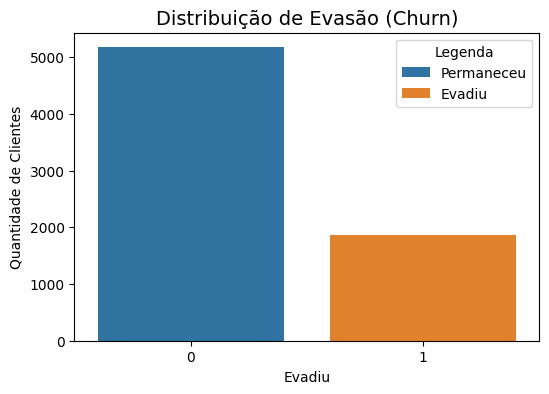

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cria o gr√°fico
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=dados_final, x='evadiu', palette='tab10')

# Adiciona t√≠tulo e r√≥tulos
plt.title('Distribui√ß√£o de Evas√£o (Churn)', fontsize=14)
plt.xlabel('Evadiu')
plt.ylabel('Quantidade de Clientes')

# Adiciona a legenda personalizada
plt.legend(handles=ax.patches, labels=['Permaneceu', 'Evadiu'], title='Legenda')

plt.show()

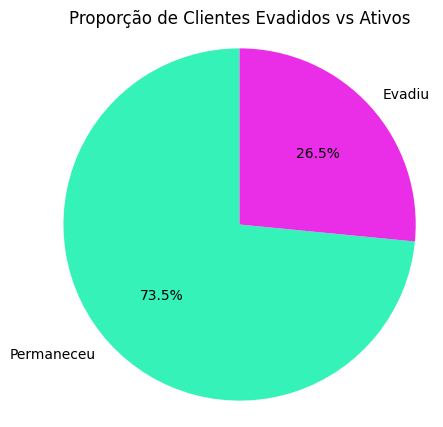

In [ ]:
# Dados de propor√ß√£o
labels = ['Permaneceu', 'Evadiu']
sizes = dados_final['evadiu'].value_counts().sort_index()
colors = ['#35f2b9','#ea2ee7']

plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Propor√ß√£o de Clientes Evadidos vs Ativos')
plt.axis('equal')
plt.show()

In [ ]:
variaveis_categoricas = [
    'genero', 'tipo_contrato', 'forma_pagamento', 'tipo_internet',
    'servico_telefone', 'suporte_tecnico', 'tv_streaming', 'filmes_streaming',
    'tem_dependentes', 'idoso', 'tem_parceiro', 'fatura_online'
]

In [ ]:
for var in variaveis_categoricas:
    print(f"\nTaxa de evas√£o por categoria: {var}")
    tabela = pd.crosstab(dados_final[var], dados_final['evadiu'], normalize='index') * 100
    tabela.columns = ['Permaneceu (%)', 'Evadiu (%)']
    display(tabela.sort_values('Evadiu (%)', ascending=False).style.format("{:.1f}"))
    print("\n")


Taxa de evas√£o por categoria: genero





Taxa de evas√£o por categoria: tipo_contrato





Taxa de evas√£o por categoria: forma_pagamento





Taxa de evas√£o por categoria: tipo_internet





Taxa de evas√£o por categoria: servico_telefone





Taxa de evas√£o por categoria: suporte_tecnico





Taxa de evas√£o por categoria: tv_streaming





Taxa de evas√£o por categoria: filmes_streaming





Taxa de evas√£o por categoria: tem_dependentes





Taxa de evas√£o por categoria: idoso





Taxa de evas√£o por categoria: tem_parceiro





Taxa de evas√£o por categoria: fatura_online


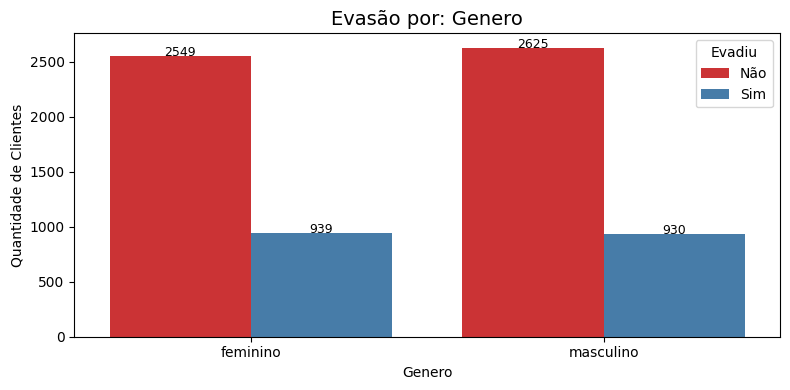

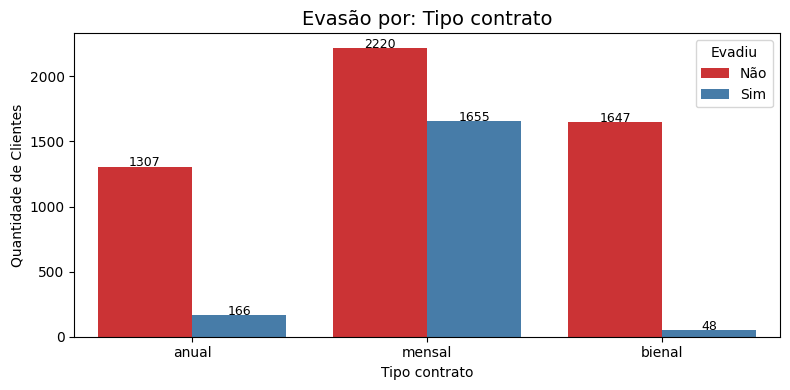

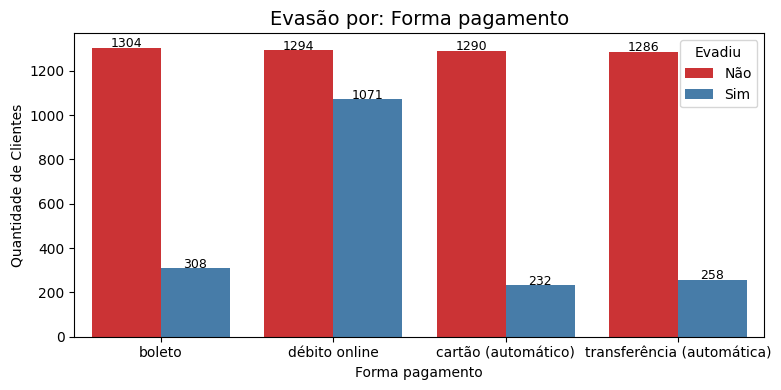

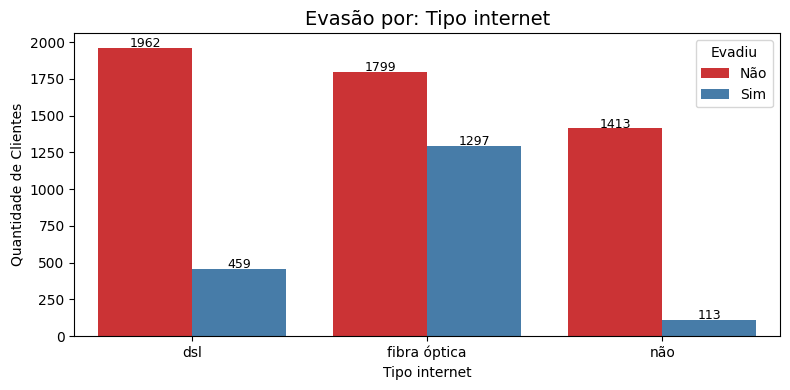

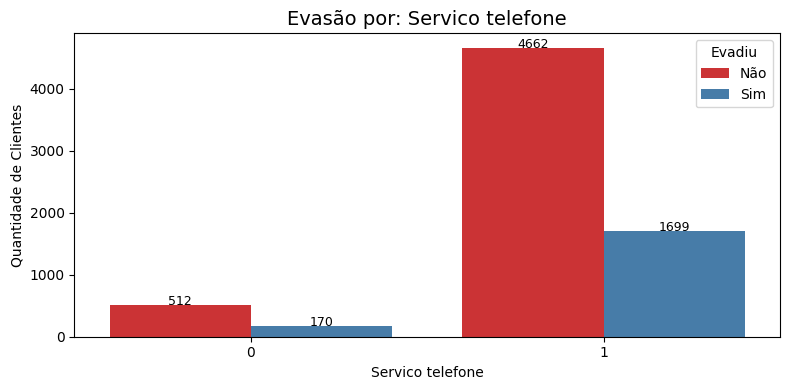

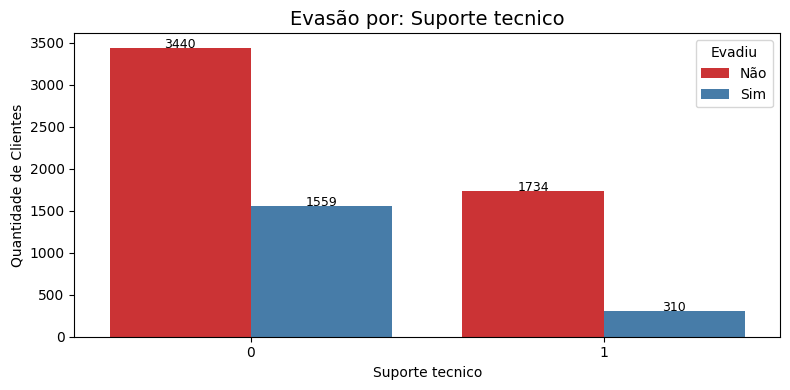

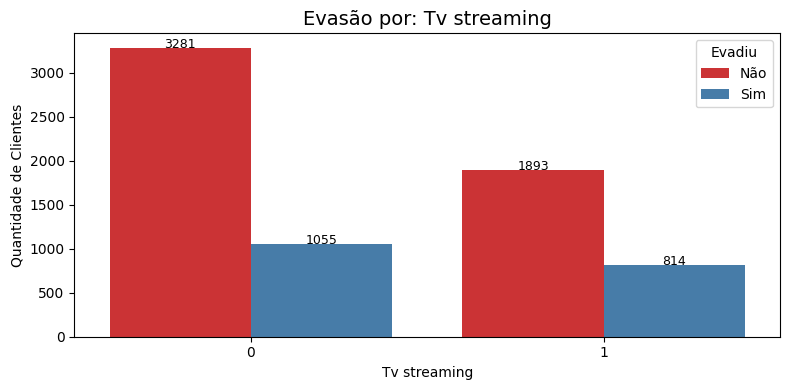

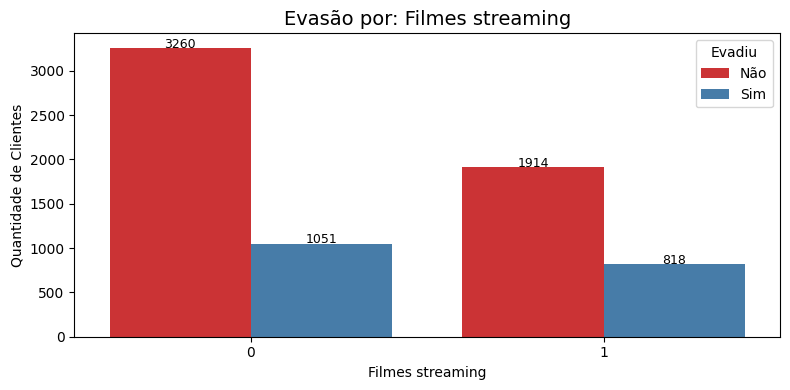

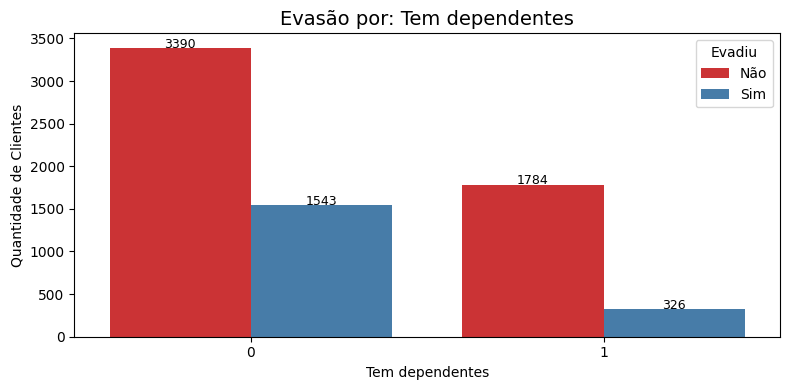

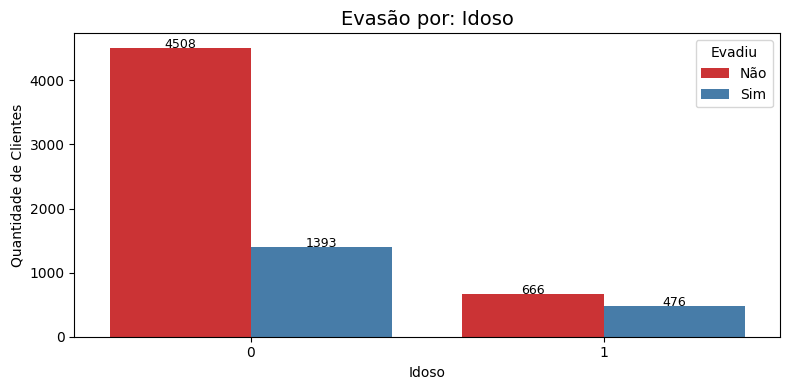

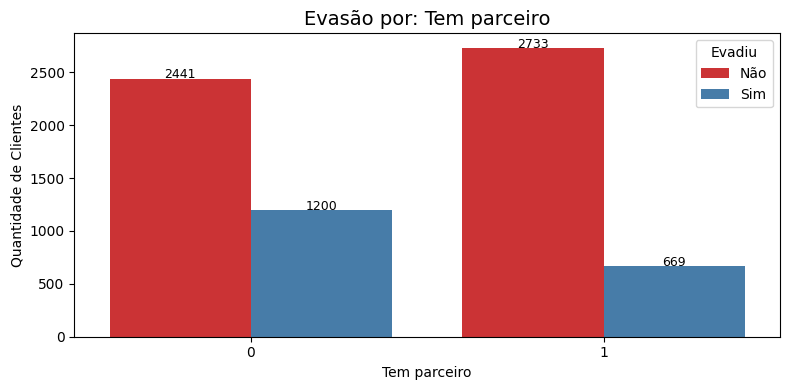

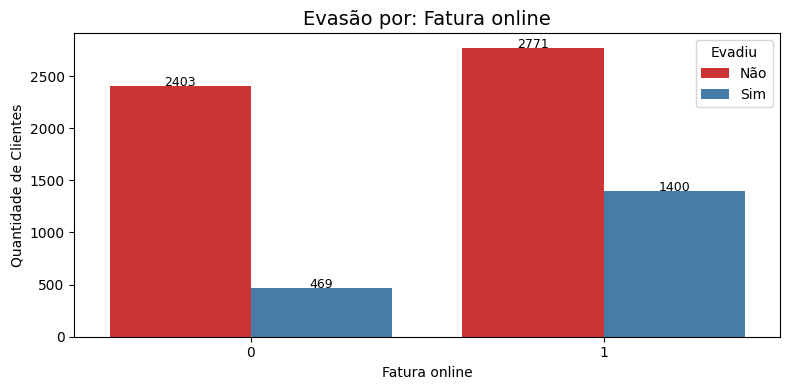

In [ ]:
for var in variaveis_categoricas:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(data=dados_final, x=var, hue='evadiu', palette='Set1')

    titulo = var.replace("_", " ").capitalize()

    plt.title(f'Evas√£o por: {titulo}', fontsize=14)
    plt.xlabel(titulo)
    plt.ylabel('Quantidade de Clientes')
    plt.legend(title='Evadiu', labels=['N√£o', 'Sim'])

    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height + 2),
                        ha='center', fontsize=9)

    plt.tight_layout()
    plt.show()
    print("\n")

In [ ]:
ranking = []

for var in variaveis_categoricas:
    tabela = pd.crosstab(dados_final[var], dados_final['evadiu'], normalize='index') * 100
    if 1 in tabela.columns:
        max_churn = tabela[1].max()
        categoria_max = tabela[1].idxmax()
        ranking.append((var, categoria_max, round(max_churn, 1)))

ranking_df = pd.DataFrame(ranking, columns=['Vari√°vel', 'Categoria com maior evas√£o', 'Evas√£o (%)'])
display(ranking_df.sort_values('Evas√£o (%)', ascending=False))

Vari√°vel Categoria com maior evas√£o  Evas√£o (%)
2    forma_pagamento              d√©bito online        45.3
1      tipo_contrato                     mensal        42.7
3      tipo_internet               fibra √≥ptica        41.9
9              idoso                          1        41.7
11     fatura_online                          1        33.6
10      tem_parceiro                          0        33.0
8    tem_dependentes                          0        31.3
5    suporte_tecnico                          0        31.2
6       tv_streaming                          1        30.1
7   filmes_streaming                          1        29.9
0             genero                   feminino        26.9
4   servico_telefone                          1        26.7

In [ ]:
dados_final.groupby('evadiu')[['conta_total', 'conta_mensal', 'tempo_meses', 'conta_diaria']].mean()

conta_total  conta_mensal  tempo_meses  conta_diaria
evadiu                                                      
0       2549.911442     61.265124    37.569965       2.04208
1       1531.796094     74.441332    17.979133       2.48145

In [ ]:
variaveis_numericas = ['tempo_meses', 'conta_total', 'conta_mensal', 'conta_diaria']

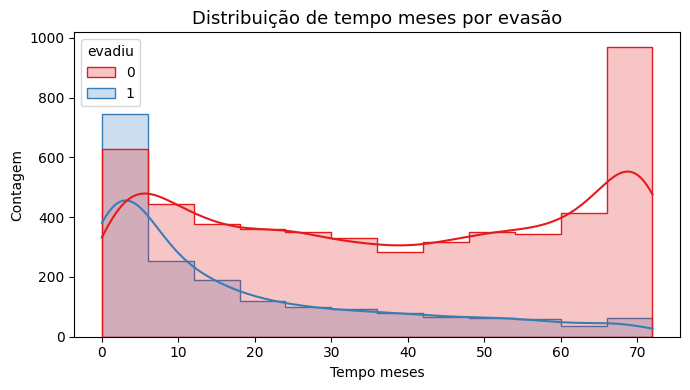

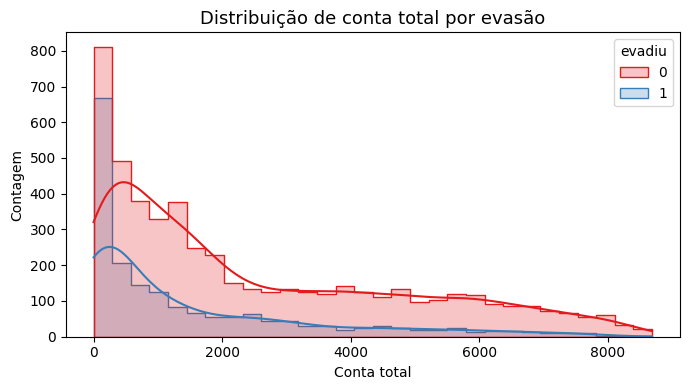

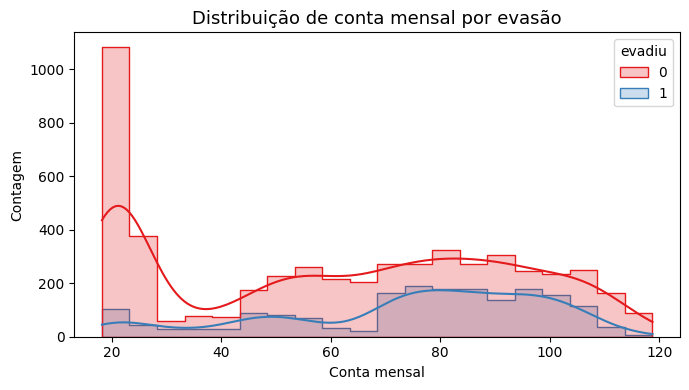

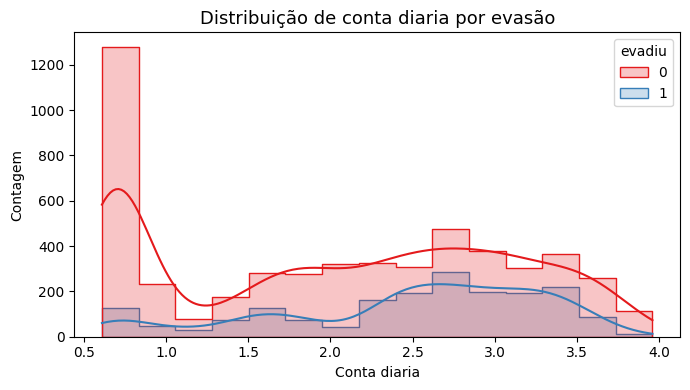

In [ ]:
bins_dict = {
    'tempo_meses': 12,
    'conta_total': 30,
    'conta_mensal': 20,
    'conta_diaria': 15
}

for var in variaveis_numericas:
    plt.figure(figsize=(7,4))
    sns.histplot(data=dados_final, x=var, hue='evadiu', bins=bins_dict[var], kde=True, element='step', palette='Set1')
    plt.title(f'Distribui√ß√£o de {var.replace("_", " ")} por evas√£o', fontsize=13)
    plt.xlabel(var.replace("_", " ").capitalize())
    plt.ylabel('Contagem')
    plt.tight_layout()
    plt.show()
    print("\n")

# üìä Extra: An√°lise de Correla√ß√£o entre Vari√°veis

In [ ]:
variaveis_numericas = ['tempo_meses', 'conta_total', 'conta_mensal', 'conta_diaria', 'evadiu']

matriz_corr = dados_final[variaveis_numericas].corr()

print(matriz_corr['evadiu'].sort_values(ascending=False))

evadiu          1.000000
conta_diaria    0.193412
conta_mensal    0.193356
conta_total    -0.198324
tempo_meses    -0.352229
Name: evadiu, dtype: float64


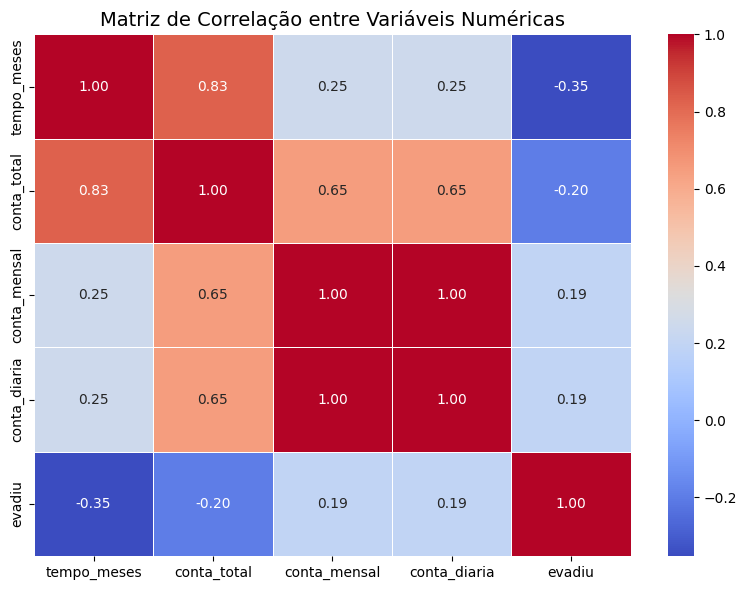

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correla√ß√£o entre Vari√°veis Num√©ricas', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
colunas_servicos = [
    'servico_telefone', 'multiplas_linhas', 'tipo_internet',
    'seguranca_online', 'backup_online', 'protecao_dispositivo',
    'suporte_tecnico', 'tv_streaming', 'filmes_streaming'
]

In [ ]:
# Converter 'tipo_internet' para bin√°rio, j√° que n√£o era num√©rica
dados_final['tem_internet'] = dados_final['tipo_internet'].apply(lambda x: 0 if x == 'no' else 1)

# Criar uma nova coluna com a soma de servi√ßos por cliente
dados_final['qtd_servicos'] = (
    dados_final[['servico_telefone', 'multiplas_linhas',
                 'seguranca_online', 'backup_online',
                 'protecao_dispositivo', 'suporte_tecnico',
                 'tv_streaming', 'filmes_streaming', 'tem_internet']]
    .sum(axis=1)
)

# Ver a m√©dia de servi√ßos por grupo de evas√£o
media_servicos_por_evasao = dados_final.groupby('evadiu')['qtd_servicos'].mean()

print(media_servicos_por_evasao)

evadiu
0    4.446270
1    4.132156
Name: qtd_servicos, dtype: float64


In [ ]:
media_formatada = media_servicos_por_evasao.rename(index={0: 'Permaneceram', 1: 'Evadiram'})
display(media_formatada.to_frame(name='M√©dia de Servi√ßos Contratados'))

M√©dia de Servi√ßos Contratados
evadiu                                     
Permaneceram                       4.446270
Evadiram                           4.132156

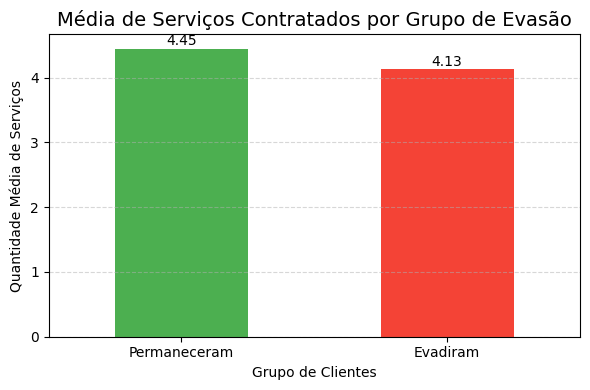

In [ ]:
plt.figure(figsize=(6,4))
media_formatada.plot(kind='bar', color=['#4CAF50', '#F44336'])
plt.title('M√©dia de Servi√ßos Contratados por Grupo de Evas√£o', fontsize=14)
plt.ylabel('Quantidade M√©dia de Servi√ßos')
plt.xlabel('Grupo de Clientes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for i, v in enumerate(media_formatada):
    plt.text(i, v + 0.05, f'{v:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

#üìÑRelatorio Final



# üìä Relat√≥rio Final - An√°lise de Evas√£o de Clientes (Churn) - Telecom X

## üîç Introdu√ß√£o

A Telecom X est√° enfrentando um problema cr√≠tico relacionado √† evas√£o de clientes (*churn*). Para entender os fatores que influenciam os cancelamentos e subsidiar estrat√©gias de reten√ß√£o, foi realizada uma an√°lise completa dos dados de clientes, contemplando extra√ß√£o, transforma√ß√£o, an√°lise explorat√≥ria e correla√ß√µes.

---

## üóÇÔ∏è Extra√ß√£o e Estrutura Inicial dos Dados

- Os dados foram extra√≠dos de uma URL p√∫blica no formato `.json`.
- O dataset possu√≠a colunas aninhadas com informa√ß√µes detalhadas dos clientes.
- Total de registros: **7267 clientes** com 6 colunas principais, sendo que 4 continham dados em formato de dicion√°rio.

---

## üßπ Limpeza e Transforma√ß√£o dos Dados

### üîÑ Normaliza√ß√£o

- As colunas `customer`, `phone`, `internet`, `account` foram normalizadas com `pd.json_normalize`.
- As colunas normalizadas foram concatenadas com `customerID` e `Churn`.

### ‚ùó Tratamento de Dados Faltantes e Inconsist√™ncias

- Valores vazios identificados em `Churn` (224) e `Charges.Total` (11).
- `Charges.Total` possu√≠a espa√ßos em branco, tratados com `.str.strip()`.
- Campos vazios em `Charges.Total` foram convertidos para `0`.
- Registros com `Churn` nulo foram removidos da base.

### üß≠ Padroniza√ß√£o e Convers√µes

- Todas as colunas categ√≥ricas foram convertidas para `lowercase`.
- Valores como `"no internet service"` foram tratados como `"no"` para padroniza√ß√£o.
- Colunas categ√≥ricas bin√°rias foram convertidas em **0 e 1** (ex: `yes ‚Üí 1`, `no ‚Üí 0`).
- Colunas renomeadas para o portugu√™s (ex: `gender ‚Üí genero`, `Contract ‚Üí tipo_contrato`).

---

## üÜï Cria√ß√£o de Novas Vari√°veis

- `conta_diaria` = `conta_mensal` / 30
- `tem_internet`: vari√°vel bin√°ria derivada de `tipo_internet`
- `qtd_servi√ßos`: soma total dos servi√ßos contratados por cliente

---

## üìà An√°lise Descritiva

Foi aplicado `.describe()` para vari√°veis num√©ricas:

- `tempo_meses` varia de 0 a 72 meses (m√©dia de ~32 meses)
- `conta_total` e `conta_mensal` possuem distribui√ß√£o assim√©trica
- `conta_diaria`: m√©dia ~2.15

---

## üìä Distribui√ß√£o da Evas√£o

- Propor√ß√£o de churn:
  - **73%** dos clientes permaneceram
  - **27%** evadiram
- Gr√°fico de barras com legenda (`0 = permaneceu`, `1 = evadiu`)

---

## üìã An√°lise Categ√≥rica por Evas√£o

### üîé Vari√°veis Avaliadas

- `genero`, `tipo_contrato`, `forma_pagamento`, `fatura_online`, `tv_streaming`, entre outras

### üß† Resultados Relevantes

- **Contrato mensal** ‚Üí maior taxa de churn
- **Cheque eletr√¥nico** ‚Üí m√©todo com maior evas√£o
- **Fatura online** ‚Üí mais propensa √† evas√£o que fatura f√≠sica
- Menor quantidade de servi√ßos contratados ‚Üí maior churn

Al√©m disso:

- Utilizado `pd.crosstab()` para cruzamento e ranking das categorias com maior churn

---

## üìâ An√°lise Num√©rica por Evas√£o

### üìå Vari√°veis Avaliadas

- `tempo_meses`, `conta_total`, `conta_mensal`, `conta_diaria`

### üìä Visualiza√ß√µes

- Histogramas com `kde`
- Gr√°ficos de barras com m√©dia das vari√°veis por evas√£o

### üìå Observa√ß√µes

- Clientes com **menor tempo de contrato** ‚Üí maior churn
- Pequenas diferen√ßas em `conta_total` e `conta_diaria` entre evadidos e n√£o evadidos

---

## üîÅ Correla√ß√µes (Extra)

### Correla√ß√£o com `evadiu`

| Vari√°vel         | Correla√ß√£o |
|------------------|------------|
| tempo_meses      | -0.35      |
| conta_total      | -0.20      |
| conta_mensal     |  0.19      |
| conta_diaria     |  0.19      |

### üìå Quantidade de Servi√ßos Contratados

- M√©dia de **4.44** servi√ßos entre clientes que **n√£o evadiram**
- M√©dia de **4.13** entre clientes que **evadiram**

---

## ‚úÖ Conclus√µes e Insights

- **Tempo de perman√™ncia** √© o maior preditor de churn
- **Contratos mensais** aumentam a evas√£o
- **Clientes com menos servi√ßos contratados** t√™m maior propens√£o a cancelar
- Formas de pagamento autom√°ticas (ex: d√©bito em conta) t√™m **menor evas√£o**

---

## üí° Recomenda√ß√µes Estrat√©gicas

- Incentivar **contratos de longo prazo** com benef√≠cios progressivos
- Estimular **pagamentos autom√°ticos**
- Criar campanhas de reten√ß√£o para **clientes novos com poucos servi√ßos**
- Desenvolver um **modelo preditivo de churn** usando `tempo_meses`, `qtd_servi√ßos`, `tipo_contrato`, `forma_pagamento`, etc.